In [1]:
% matplotlib inline

In [2]:
import numpy as np
import pylab as pl
import random
import matplotlib 
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import tree 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.svm import SVC
#%matplotlib inline

# SUPPORT VECTOR MACHINE (SVM)

# OBJECTIVES
To gets hands on experience on <B>Support Vector Machine</B> by understanding new concepts like 
* Maximum Margin Classifier Concept 
    * Theory - Cost Function for Hard Margin Support Vector Machine 
    * Theory - Cost Function for Soft Margin Support Vector Machine (Regularization)
* Bias Vs Variance - Controlling Margin through Regularization in Soft Margin Approach
    * Exercise 1 - Influence of C Parameter
    * Learning Curve to check bias vs variance error.
    * Similarity with Regularization parameter concept
* Kernel Trick
    * Non-linear separable dataset
* Intrepretability of Support Vector Machine
* Accuracy Matrix Concept 
  
<B>Problem:</B> We will solve two set of problems 
1. Classifying Microchip
2.  Materials property
    * Regression for determining material property value (band gap problem)
    * Classification for determining usefulness of material for a relevant design

# INTRODUCTION
### Question :  If you were to choose a line (amongst the 3 lines in the figure below) in order to to classify the two classes , then which line would you choose so that any new data would have a higher probability of being  classified successfully? and Why would you choose that line? Hint: Margin. 

<img src='./images/svm1.png'> 

## CONCEPT OF MARGIN - MAXIMUM MARGIN CLASSIFIER
SVM follows this intuition and hence is called a <b>maximum margin classifer</b>.

<table><tr><td><img src='./images/svm2.png'></td><td><img src='./images/svmmargin.png'></td></tr></table>

<br>

<br>


#### How does maximum margin concept help with accuracy?

* This has to do with <b>overfitting (variance) vs underfitting (bias)</b>.

    * Decision boundaries with large margins tend to have a <b>lower generalization error</b> whereas models with small margins are more prone to overfitting.


* We will show this after having a look at the mathematical theory below.


<br>

<br>


### THEORY

* How does SVM finds this margin?
    * what is support vector?
    * what is Hyperplane? 


In order to identify this margin, SVM follows the following routes :



<img style="float:left"; src='./images/svmhow.png'> 

1 SVM searches for the closest points, which it calls the <b>"support vectors"</b>. The name "support vector machine" is due to the fact that these points are like vectors and that the line is "supported by" the closest points. 


<br>


<br>


2 The SVM draws a line connecting the support vectors (see the line labeled 'w' in Figure 2). It draws this connecting line by doing vector subtraction (point A - point B). The SVM declares the best separating line to be the line that bisects and is perpendicular to the connecting line. This is defined mathematically below.
 


<br>


<br>


<br>

<br>


<br>

<b>Hyperplane</b> is the decision surface (decision boundary) separating the classes. 

In 1 dimension - It is a Point.

In 2 dimensions - It is a Line.

In 3 dimensions - It is a Plane.

In m dimensions - It is a Hyperplane with m-1 dimension.

<table><tr><td><img src='./images/svm1d.png'></td><td><img src='./images/hyperplanesvm.png'></td><td><img src='./images/svmkernel3drbf.png'></td></tr></table>

<br>


<b>Reiterate the Basic Intuition behind SVM:</b> 
Thus,  Support Vector Machine (SVM) is primarily a supervised learning classier method that performs classification tasks by constructing hyperplanes in a multidimensional space. However,  SVM can also be applied to regression problems. SVM focus  on support vectors (the data points that are the most difficult to tell apart), whereas other classifiers pay attention to all of the points. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.

<b>Reason this intuition works:</b> 
If a classifier/regressor is good at the most challenging comparisons, then the classifier will be even better at the easy comparisons. When you get a new sample (new points), it is less likely to get misclassified as SVM has already made a line that keeps the most challenging classes as far away from each other as possible, and so it is less likely that one will spillover across the line into the other's territory. 

<br>

<br>


### MATHEMATICS BEHIND THE THEORY

Depending upon the ease of separation of data (linearly,non-linearly), SVM mathematical formulations evolved.
- "Hard Margin" to "Soft Margin" to "Kernel Trick" 

Simplest - Linearly separable data using Hard Margin SVM

Complex - Non-linearly separable data using Soft Margin SVM and Kernel Trick

<table><tr><td><img src='./images/svmlinear.png';width="450";height="450"></td><td><img src='./images/nonlinearsvmdata.png'></td></tr></table>


### Cost Function for Hard Margin Support Vector Machine 

#### Hard Margin Concept 
 It does not tolerate any misclassification error in the formulation of the problem. 
 No Regularization.
 So, It is Less flexible to outliers/Noise. 
 So, it is Less Robust.

We know that a decision <b>line</b> is mathematically represented as ${x}{m} + c = y$. 

#### Similarly, in higher dimension for a hyperplane boundary surface , the equation is represented as :

For the linearly separable case, any point $\mathbf{x}$ lying on the separating hyperplane (decision boundary) satisfies the equation:

$\mathbf{x}^T\mathbf{\theta} + b = 0$ , 

where $\mathbf{\theta}$ is the vector normal to the hyperplane and $b$ is a constant that describes how much plane is shifted relative to the origin. 
<br>

<img  src='./images/svmclass.png';style="float:left"; width="400";height="400"> 

#### The SVM should do two things :

##### 1. Maximize the margin (i.e. maximize the distance between the two hyperplanes, the positive and negative hyperplanes, that are passing through nearest support vectors), 
#####  and,
##### 2. Ensure that classification is correct using constraints. 

<br>
The positive and negative hyperplanes are both parallel to the decision boundary. 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;  These hyperplanes are mathematically defined as : 

&nbsp;&nbsp;&nbsp;&nbsp;  $\mathbf{x}_{negative}^T\mathbf{\theta} + b = -1$ 

&nbsp;&nbsp;&nbsp;&nbsp;  and 

&nbsp;&nbsp;&nbsp;&nbsp;  $\mathbf{x}_{positive}^T\mathbf{\theta} + b = 1$ 


&nbsp;&nbsp;&nbsp;&nbsp;  This margin distance between these two hyperplanes is equal to  $\frac{2}{\|\mathbf{\theta}\|}$

<br>
<br>
This means that the objective is to solve $\underset{\mathbf{\theta}}{\operatorname{max}} \frac{2}{\|\mathbf{\theta}\|}$

Equivalently, it is : $\underset{\mathbf{\theta}}{\operatorname{min}} \frac{\|\mathbf{\theta}\|}{2}$



### How do we get to to the above objective equation :
  
If we subtract the two linear equations representing the hyperplanes from each other, we get:

$$\theta^T \left( x_{positive}-x_{negative} \right) = 2$$

Normalizing by $\Vert \theta \Vert = \sum_{j=1}^m \theta_j^2$ on both sides by summing over 'm' number of support vector points, we get the equation:

$$\frac {\theta^T \left( x_{positive}-x_{negative} \right)} {\Vert \theta \Vert} = \frac {2} {\Vert \theta \Vert}$$

The LHS of the equation  can then be interpreted as the distance between the positive and negative hyperplanes, which is the margin that we want to maximize. 

#### Thus, the objective function of the SVM becomes the maximization of this margin with constraints,
Maximize $ \frac {2} {\Vert \theta \Vert}$ <br>
such that, $y^{(i)} \left ( b+\theta^Tx^{(i)} \right ) \ge 1 \quad \forall i$ <br>
The above constrain equation is concise form of the two constraint equations below: 
$$b +\theta^Tx^{(i)} = \begin{cases} \ge 1 & \quad if \; y^{(i)}=1 \\ \lt -1 & \quad if \; y^{(i)}=-1 \end{cases}$$
These constraints help in samples being classified correctly. 

##### Solving the above "primal" equation can give $\theta$, the weight on the features. But, it may not be able to let us know about the "support vectors", and it won't allow us to use the "kernel trick". Both of these together help to make the problem computationally efficient. Hence, we solve this optimization problem by converting into a "dual" problem. 

Dual problem treatment involves including constraints in the objective equation. The primal objective function below :

<img src='./images/SVMO1.png'>

is converted into a lagrangian dual problem below: 

<table><tr><td><img src='./images/SVMO2.png'></td></td><td><img src='./images/SVMO3.png'></td></tr></table>


#### Using dual problem, the optimization problem can be written as:

$$\text{maximize}_{\alpha} \quad \sum_{i=1}^{n}{\alpha_i} - \frac{1}{2}\sum_{i=1}^{n}{\sum_{j=1}^{n}{y_i y_j \alpha_i \alpha_j x_i^T x_j}}$$

##### Solving the dual problem, we obtain the $\alpha_i$ (where $\alpha_i$ is the weight on the training data, and not on the features. For most training data, the associated $\alpha_i=0$, and those small number of training data for which $\alpha_i>0$ are called as the support vectors.

#####  Using dual treatment, we can identify the classes using the equation below:  

$$y^{(i)}=\theta^Tx + b = \left(\sum_{i=1}^{n}{\alpha_i y_i x_i} \right)^T x + b = \sum_{i=1}^{n}{\alpha_i y_i \langle x_i, x \rangle} + b$$

  In order to classify a query point $\mathbf{x_i}$, we calculate above equation.  Here, we really need to find only the inner products between x and the support vectors ($\alpha_i>0$ , which can be small fraction of training data) in order to make our prediction. This can be  efficiently calculated as there are only few support vectors. Further, since we now have a scalar product only involving data vectors, we may apply the kernel trick to make it more effective. 
and final prediction is done by using:
$$y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{\theta^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{\theta^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.$$

The maximal margin classifier is a very natural way to perform classification, if a separating hyper plane exists. 

However, in most real-life cases no separating hyper plane exists, and so there is no maximal margin classifier.

In such cases , we need to modify the objective function to make the SVM more robust to noise, outliers.

##  Soft Margin SVM and BIAS-VARIANCE Tradeoff.
## Bias Variance Tradeoff

### Observation  
Model performs very well on training dataset with high accuracy of classification, but fails to perform on unseen test data.

### Reason 
Error = Bias Error + Variance Error + Noise Error

### Solution dependent on the reason for error.
1. Model Complexity
2. Regularization parameter
3. Training data

### How to check for error 
 Learning Curve on k Fold Cross Validation data.


<img src='./images/bias-variance2.png'>

#### Soft Margin Concept (Hint - Regularization in SVM)
<b> Soft Margin involves introducing the slack variable $ξ$ to allow for some misclassification while allowing for larger margin</b>

* Similar to concept of use of Regularization in linear/logistic Regression to overcome the "Bias Vs Variance" Tradeoff.

* Controlling the Maximum Margin can control overfitting (variance) vs underfitting (bias)

* Larger margin can help to improve generalization ability (reduce overfitting and lower variance) at the cost of bias.

<img src='./images/softvshard.jpg'; style="float:left"; ;width="400";height="400" > 


<img src='./images/svmslack.png'; style="float:left";height="400"> 

Assuming the classes overlap in the given feature space. One way to deal with the overlap is to still maximize the margin, but allow for some points to be on the wrong side of the margin. In order to allow these, we can define the slack variables as, $\xi = ( \xi_1, \xi_2 \ldots \xi_m)$ . In such circumstances, the linear constraints need to be relaxed for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization.

<br>

<br>

The slack variable simply can be added to the linear constraints:

$$\theta^Tx^{(i)} = \begin{cases} \ge 1 & \quad if \; y^{(i)}=1-\xi^{(i)} \\ \lt -1 & \quad if \; y^{(i)}=-1 +\xi^{(i)}\end{cases}$$

#### So, the new objective function to be minimized becomes:
$$\text{minimize}_{\alpha}{\Vert \theta \Vert}^2 + C \left ( \sum_i \xi^{(i)} \right )$$


<b>C</b> is a hyperparameter called penalty of the error term. It is equivalent to regularization parameter. If C=0, it will be like hard margin classifer which has no regularization. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. Higher value of C, would lead to much smaller values of ${\Vert \theta \Vert}$ in order to mimimize the cost function. This will result in smaller margin. Thus, for large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

<b> Exercise 1 - Walk Through SVM code </b> <br>

<b> Exercise 2 - Influence of C Parameter </b>

<br>

<br>

<br>
 
## KERNAL TRICK CONCEPT

* What is a kernel and what is the need for it?

##### For non-linear separable data. 

<img src='./images/nonlineartrans.png';style="float:left"> 
Two options to separate the non-linear separable dataset -

A. Transform the boundary surface - Ditch the hyperplane and go for a non-linear curved surfaces in the original dimension. 

B. Either transform the dataset to higher dimension where they are separable using a hyperplane (linear equation in feature space).
   -  linear is simpler.
 


#### A dataset that is not linearly separable in lower dimensions (original feature space dimension) may be linearly separable in a higher-dimensional space. Thus, if we have a "transformation" that lifts the dataset to a higher-dimensional such that it is linearly separable, then we can train a linear SVM on  to find a decision boundary that separates the classes in the higher dimension. Projecting the decision boundary  found in higher dimension  back to the original space  will yield a nonlinear decision boundary. This means that we can learn nonlinear SVMs while still using the original Linear SVM formulation. 

<br>

Mathematically, in soft margin SVM equations, we can introducing a function $\phi(x)$ that maps the original feature space $x$ to a higher dimensional feature space $\phi(x)$. This allows non-linear decision boundaries.
In primal form,
\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}
In dual form,
\begin{align}
\max_{\mathbf{\alpha}}  \quad & \sum_{i=1}^{N} \alpha^{(i)} - \sum_{i=1}^{N}\sum_{j=1}^{N}  \left( y^{(i)}\alpha^{(i)}\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right) y^{(j)}\alpha^{(j)} \right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\}  
\end{align}
The optimization problem, uses the $\phi\left(\mathbf{x}^{(i)}\right)$ only in the inner product $\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right)$.

### Challenge : However, transforming from lower dimensional $(\mathbf{x}^{(i)})$ to higher dimensional $\phi\left(\mathbf{x}^{(i)}\right)$ and then taking the dot product $(\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right))$ involves prohibhitive computational and memory problems.

Instead, we can use a function $K\left(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\right)$ that is equivalent to $\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right)$ . This function maps (x(i),x(j)) to the dot product $(\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right))$ . We do not need to know and compute $\phi\left(\mathbf{x}^{(i)}\right)$ then.



<br>

<img src='./images/3.png';style="float:left">

#### The kernel trick offers a solution here. <br>
It turns out that there exist function <b>K(v,w)</b> that, given two vectors <b>v</b> and <b>w</b> in lower dimensions,  "implicitly" computes the dot product between them in a higher-dimensional without "explicitly" transforming v and w to higher dimensions. That is, we do not need to know the functions $\phi(v)$ and $\phi(w)$ - that would transform v and w to higher dimension, and nor do we need to knoe the dimensionality of higher dimension. Only knowing the function K would suffice. Such function K is called as kernel  functions. Added advantage - we do not need to know to what dimension to transform it to or the form of mapping function.

Example : In above example.

<img src='./images/ktexplain.png'> 

<img src='./images/ktexplain2.png'> 

### MATHS - How Kernel trick is used in SVM?


In SVM, the dot products in machine learning optimization formulae are replaced by kernel functions. The SVM objective function becomes :


The implications are: By using a kernel, we can implicitly transform datasets to a higher-dimensional using no extra memory, and with a minimal effect on computation time. The only effect on computation is the extra time required to compute the kernel. Depending on kernel function chosen, this can be minimal. By virtue of kernel trick, we can efficiently  learn nonlinear decision boundaries for SVMs simply by replacing all dot products in the SVM computation with kernel function. 


<br>
<br>
Various types of kernals
<img src='./images/kernals.png'> 




<br>
<br>
<b> Exercise 2 to do - Influence of Kernel function and Gamma </b>


<br>
<br>
<br>
<br>
While mapping data to a high dimensional feature space via φ does generally increase the likelihood that the data is separable, we can’t guarantee that it always will be so. Also, in some cases it is not clear that finding a separating hyperplane is exactly what we’d want to do, since that might be susceptible to outliers.

##  INTREPRETABILITY OF SVM

Machine learning identifies a pattern. Intrepretability of ML can help us to identify the cause behind a pattern. Why a particular pattern is observed? One way to do this is by identifying the dependencies of features on final result using the computed weights (coefficients).

For SVM, intrepretability is possible only for linear SVM. For a general kernel it is difficult to interpret the SVM weights.

Reason : In linear SVM the resulting separating plane is in the same space as your input features. Therefore its coefficients can be viewed as weights of the input's "dimensions". In other kernels, the separating plane exists in another space - a result of kernel transformation of the original space. Its coefficients are not directly related to the input space. In fact, for the rbf kernel the transformed space is infinite-dimensional.

1)  Class prediction by weights - "The weights (vector w) represent the hyperplane. It gives you the coordinates of a vector which is orthogonal to the hyperplane - these are the coefficients given by svm.coef_. It's direction gives us the predicted class, so if you take the dot product of any point with the vector, you can tell on which side it is: if the dot product is positive, it belongs to the positive class, if it is negative it belongs to the negative class."

2) "Importance of each feature - The square of weights (of features) as assigned by a linear kernel SVM can be used as ranking metric for deciding the relevance of a particular attribute. If the SVM finds only one feature useful for separating the data, then the hyperplane would be orthogonal to that axis. So, you could say that the absolute size of the coefficient relative to the other ones gives an indication of how important the feature was for the separation. For example if only the first coordinate is used for separation, w will be of the form (x,0) where x is some non zero number and then |x|>0."

3) Why difficult in non-linear SVM? Because weights are computed implicitly in non linear. For linear case, SVM constructs a hyperplane w, which is then used for separating data by calculating the inner product $w.x$ and checking the sign of $<w,x>+b$ (where b is a trained threshold). While in the linear case we can simply reconstruct the w by taking SUM y_i alpha_i x_i, where x_i are support vectors, y_i their classes and alpha_i the dual coefficient found in the optimization process, it is much more complex when we are dealing with infinitely dimensional space induced by RBF kernel. The so called kernel trick shows, that we can calculate the inner product $<w,x>+b$ using a kernel easily, so we can classify without computing the actual w. So what is w exactly? It is a linear combination of gaussians centered in support vectors (some of which have negative coefficients). You can again compute $SUM y_i alpha_i f(x_i)$, where f is a feature projection (in this case it would be a function returning gaussian distribution centered in given point, with variance equal to 1/(2gamma). The actual decision boundary is now described as points where the inner product of this function and the gaussian centered in this point is equal to -b. 


## ACCURACY MATRIX
<br>
<br>
<br>
<br>

### BALANCED DATASET
<br>
<br>
<br>
<br>


### IMBALANCED DATASET

<br>
<br>
<br>
<br>

## PROS AND CONS of SVM

<b>Advantages</b>

Control over Generalization Ability of algorithm through placement of hyperplane
Avoid difficulties of using linear functions in the high dimensional feature
Accuracy
Works well on smaller cleaner datasets
It can be more efficient because it uses a subset of training points


<b>Disadvantages</b>
Computaional cost is prohibhitive with larger datasets as the training time with SVMs can be high
It can be less effective on noisier datasets with overlapping classes


## PARAMETER TUNING IN SVM (OPTIONAL EXERCISE)

<b>Popular parameter-tuning technique:</b>
 
 K Fold cross-validation in a Grid Space Search. 

<b>Parameters</b>

<b>C</b> :  Penalty parameter C of the error term.

<b>epsilon</b> : Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

<b>kernel</b> :  Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

<b>degree</b> : Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

<b>gamma</b> : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

<b>coef0 : Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.




# Examples
 
## Example 1 -  Linear Separation

### Introduction to SVM code - Linear SVM
Linear kernel is defined as K(u,v) = u.v (dot product)
Parameter - C.
Construct Hyperplane.


In [46]:
def plot_learning_curve(estimator,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Cross-validation Training accuracy score (not error)")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing accuracy score(not error)")

    plt.legend(loc="best")
    plt.show()
#    plt.savefig(outfile,bbox_inches='tight')
    return (plt,train_sizes, train_scores, test_scores)





weights: 
[[-1.16379545 -0.43066031]]
 
Intercept: 
[ 0.35959385]
 
 
Hyperplane Equation ω^[T] x+ b = 0
 
Equation - w[0]*x+w[1]*y+intercept=0
 
So w[1]*y=-w[0]*x-intercept
 
Now divide both sides by w[1], and you get
 
y=-(w[0]/w[1])*x-intercept/w[1].
 
Margin compute 0.805852228378


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


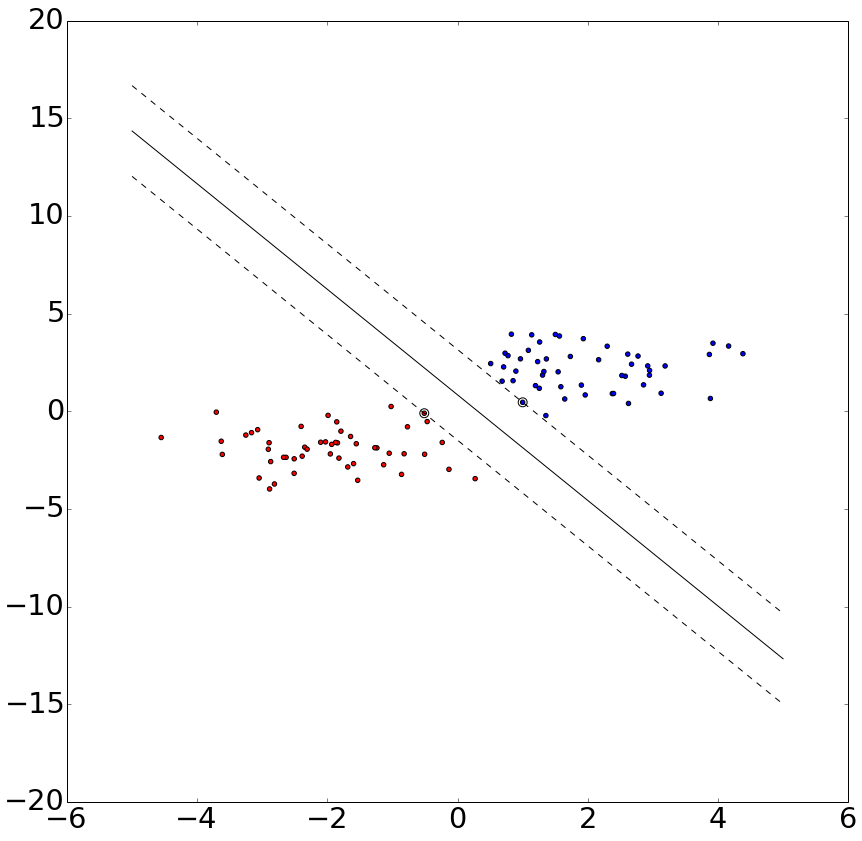

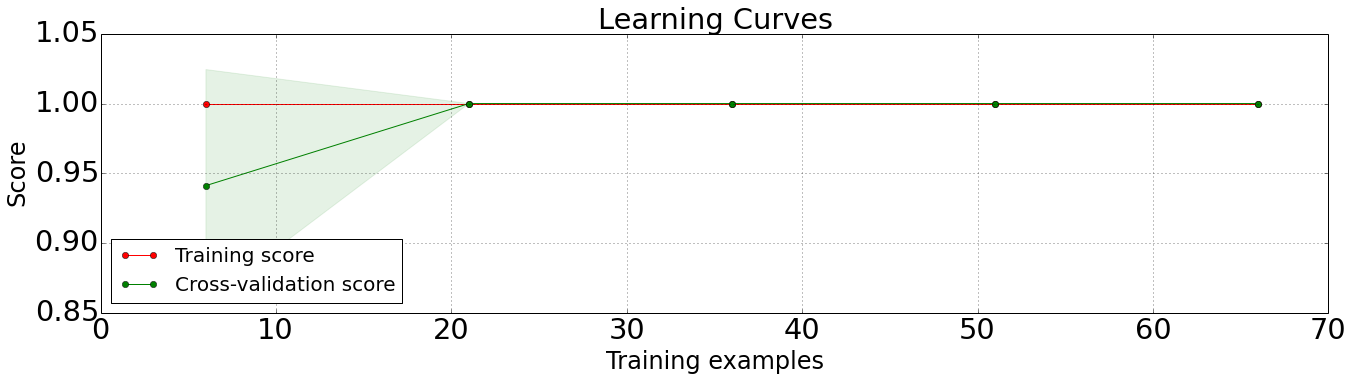

In [45]:
from sklearn import svm

# Source:  http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

np.random.seed(0)
X = np.r_[np.random.randn(50, 2) - [2, 2], np.random.randn(50, 2) + [2, 2]]
Y = ['r'] * 50 + ['b'] * 50

# fit the model
clf = svm.SVC(kernel='linear',C=1000)
clf.fit(X, Y)

print('weights: ')
print(clf.coef_)
print(' ')
print('Intercept: ')
print(clf.intercept_)
print(' ')
print(' ')
print('Hyperplane Equation','ω^[T] x+ b = 0')
print(' ')
print('Equation - w[0]*x+w[1]*y+intercept=0')
print(' ')
print('So w[1]*y=-w[0]*x-intercept')
print(' ')
print('Now divide both sides by w[1], and you get')
print(' ')
print('y=-(w[0]/w[1])*x-intercept/w[1].')
print(' ')
# get the separating hyperplane
w = clf.coef_[0]
xx = np.linspace(-5, 5)
yy = (-w[0] / w[1]) * xx - (clf.intercept_[0]) / w[1]


margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print('Margin compute',margin)
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]

Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_down = (-w[0] / w[1]) * xx +  Intercept_line_through_SV

b = clf.support_vectors_[-1]
Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_up = (-w[0] / w[1]) * xx + Intercept_line_through_SV

# plot the line, the points, and the nearest vectors to the plane

plt.figure(figsize=(14,14))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

X_train=X 
y_t=Y

from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
#plt.axis('tight')
#plt.show()

## Example 2 -  Linear Separation

###  Linear SVM - Try changing C value below

- Observe the influence on Margin

### Influence of parameter C 
C=0.1
 
C=1

C=100

C=1000



weights: 
[[-0.00092032 -0.00099893]]
 
Intercept: 
[ 0.0002339]
 
 
Hyperplane Equation ω^[T] x+ b = 0
 
Equation - w[0]*x+w[1]*y+intercept=0
 
So w[1]*y=-w[0]*x-intercept
 
Now divide both sides by w[1], and you get
 
y=-(w[0]/w[1])*x-intercept/w[1].
 
Margin compute 736.240632945


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


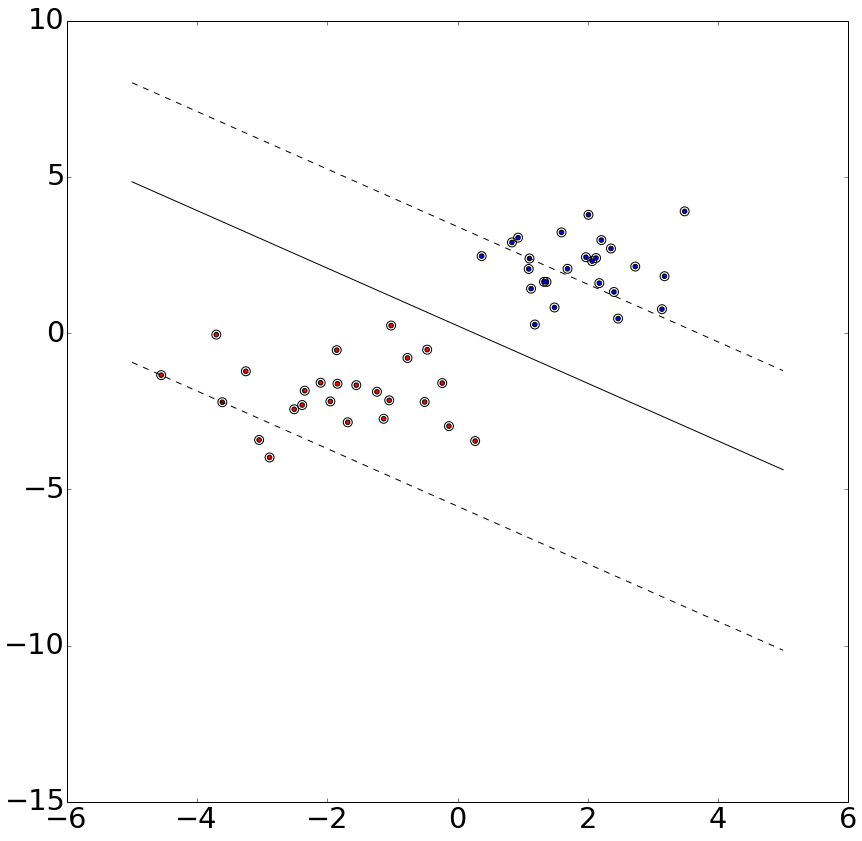

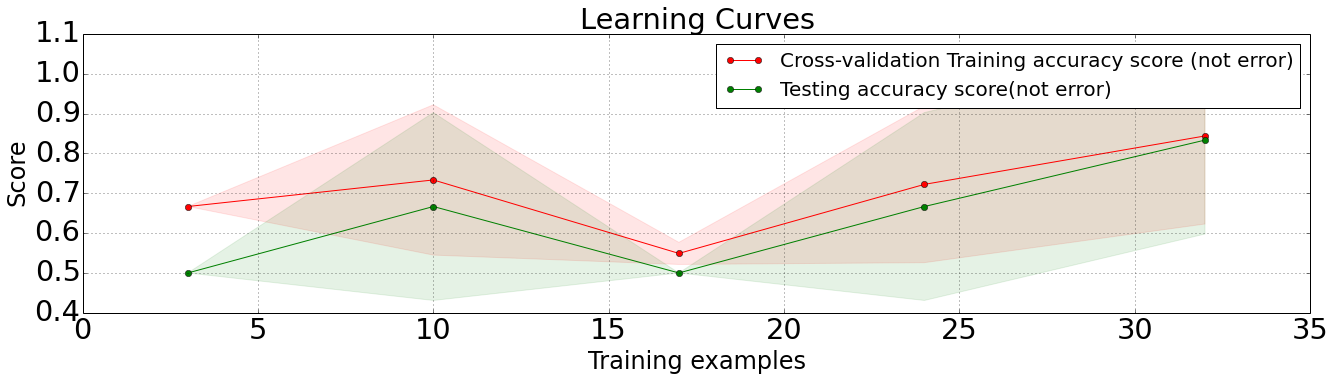

In [51]:
from sklearn import svm

# Source:  http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

np.random.seed(0)
X = np.r_[np.random.randn(25, 2) - [2, 2], np.random.randn(25, 2) + [2, 2]]
Y = ['r'] * 25 + ['b'] * 25

# fit the model
clf = svm.SVC(kernel='linear',C=1e-05)
clf.fit(X, Y)

print('weights: ')
print(clf.coef_)
print(' ')
print('Intercept: ')
print(clf.intercept_)
print(' ')
print(' ')
print('Hyperplane Equation','ω^[T] x+ b = 0')
print(' ')
print('Equation - w[0]*x+w[1]*y+intercept=0')
print(' ')
print('So w[1]*y=-w[0]*x-intercept')
print(' ')
print('Now divide both sides by w[1], and you get')
print(' ')
print('y=-(w[0]/w[1])*x-intercept/w[1].')
print(' ')
# get the separating hyperplane
w = clf.coef_[0]
xx = np.linspace(-5, 5)
yy = (-w[0] / w[1]) * xx - (clf.intercept_[0]) / w[1]


margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print('Margin compute',margin)
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]

Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_down = (-w[0] / w[1]) * xx +  Intercept_line_through_SV

b = clf.support_vectors_[-1]
Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_up = (-w[0] / w[1]) * xx + Intercept_line_through_SV

# plot the line, the points, and the nearest vectors to the plane

plt.figure(figsize=(14,14))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

X_train=X 
y_t=Y

from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
#plt.axis('tight')
#plt.show()

## Example 3 -    Non-Linear Kernel RBF SVM 

- Linear Kernel Versus Non Linear Kernel


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#print(S300099new_scaled.mean(axis=0))
#print(S300099new_scaled.std(axis=0))

data = np.loadtxt('./data/microchip.csv', delimiter=",")
X = data[:,:2]
Y = data[:,2]

#X = preprocessing.scale(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

print ('Check for skewness/balanced dataset')
y1c=[1 if 0<value else 0 for value in Y]
print('percent of class 1', y1c.count(1)/len(y1c)*100)

X=X_train
Y=Y_train

y1ctest=[1 if 0<value else 0 for value in Y_test]
print('TEST CASE - percent of class 1', y1ctest.count(1)/len(y1ctest)*100)

y1ctest=[1 if 0<value else 0 for value in Y_train]
print('TRAIN CASE - percent of class 1', y1ctest.count(1)/len(y1ctest)*100)

Check for skewness/balanced dataset
percent of class 1 49.152542372881356
TEST CASE - percent of class 1 47.22222222222222
TRAIN CASE - percent of class 1 50.0


In [54]:
def prettyPicture(clf, X_test, y_test,index):
    #x_min = 0.0; x_max = 1.0
    #y_min = 0.0; y_max = 1.0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig=plt.figure(figsize=(14,14))
    ax = fig.add_subplot(111)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z)#, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "r", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "b", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    score = clf.score(X_test, y_test)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right',color='green')
    plt.show()
#    flaga = 'decisionboundarylinear %s' % str(index)
#    print(flag)
#    plt.savefig(flaga + '.png',box_inches='tight')
       


CLASSIFY MICROCHIP - NON-LINEAR DATASET
 
COMPARE DECISION BOUNDARY AND ACCURACY SCORE - LINEAR VS RBF KERNEL
Press Enter to continue...
RBF KERNEL


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


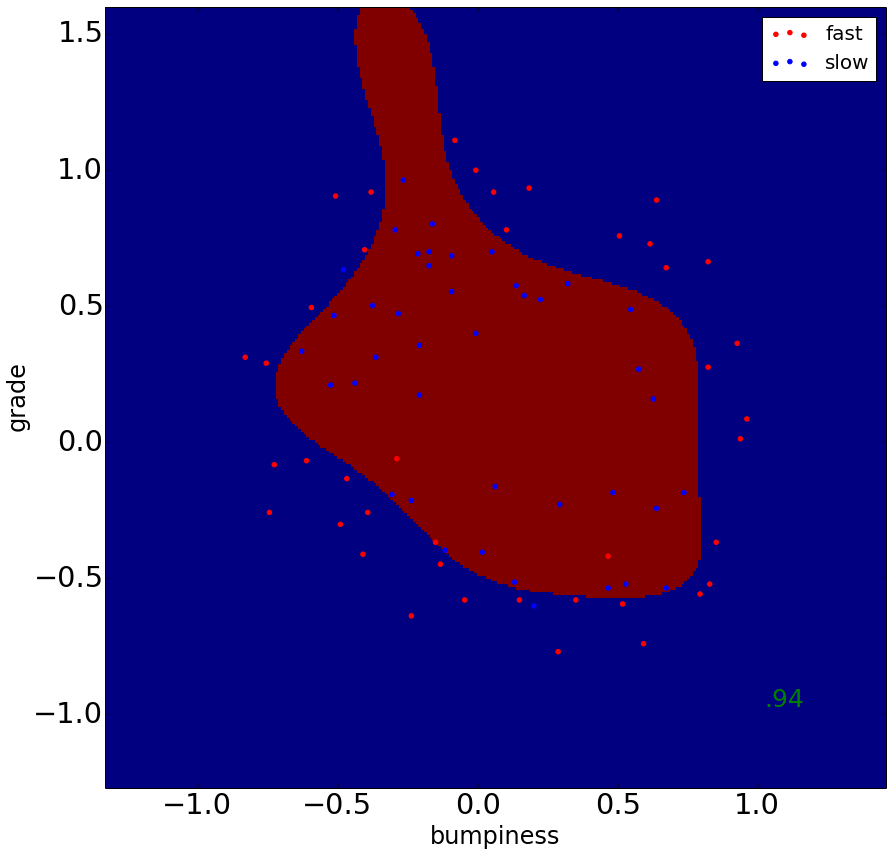

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


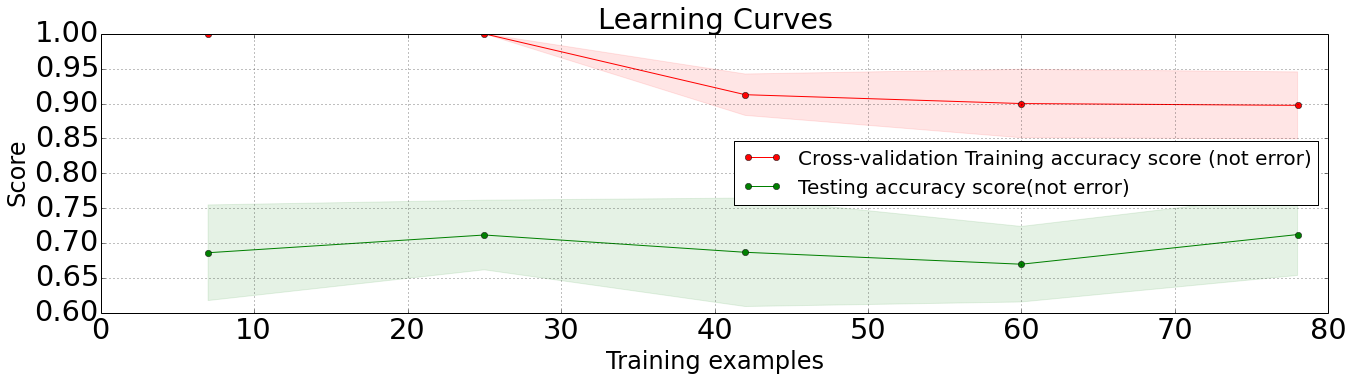

Press Enter to continue...
LINEAR KERNEL


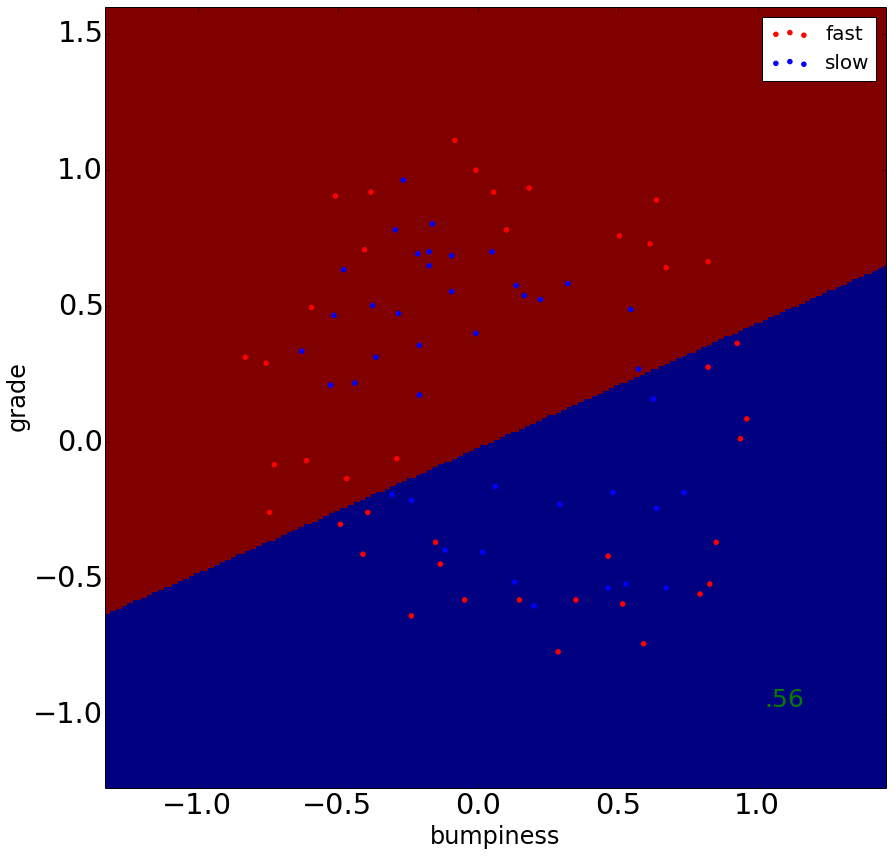

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


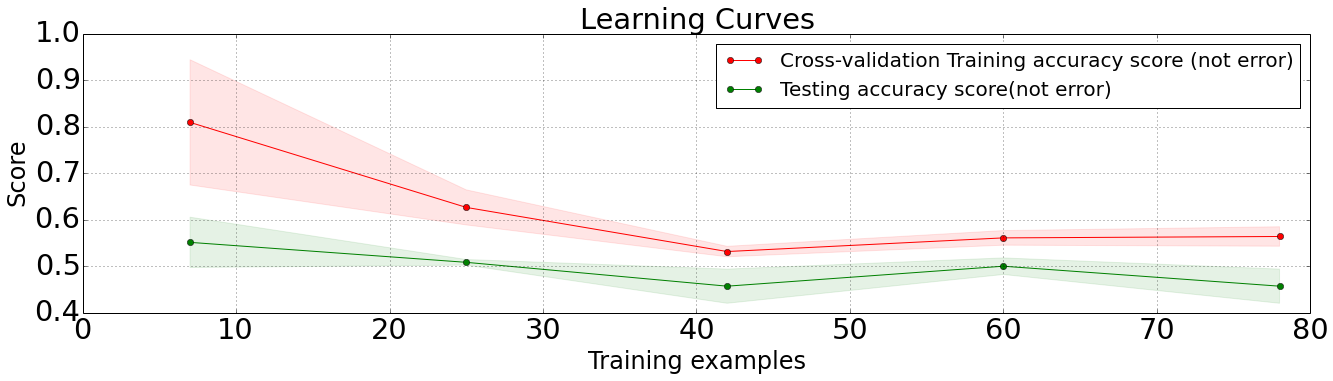

In [60]:
from sklearn import datasets, svm, pipeline
print ('CLASSIFY MICROCHIP - NON-LINEAR DATASET')
print (' ')
print ('COMPARE DECISION BOUNDARY AND ACCURACY SCORE - LINEAR VS RBF KERNEL')
input("Press Enter to continue...")
print ('RBF KERNEL')
C=1000
clf=svm.SVC(kernel='rbf',C=1000, gamma=1.4)
clf.fit(X,Y)
prettyPicture(clf, X, Y,C);
y_predict=clf.predict(X_test)
accuracy_score(Y_test,y_predict)

X_train = data[:,:2]
y_t= data[:,2]



from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

input("Press Enter to continue...")
print ('LINEAR KERNEL')
C=1000
clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X,Y)
prettyPicture(clf, X, Y,C);
y_predict=clf.predict(X_test)
accuracy_score(Y_test,y_predict)
from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

## Example 4 -    Non-Linear Kernel RBF SVM 

- Observe the influence of gamma

- To be done by you. In code below - Change gamma.


### Two parameters - C and Gamma  (C is fixed)
gamma=0.1

gamma=1.4

gamma=1e-05

gamma=1000

## Example 5 -   PARAMETER TUNING USING GRID SPACE - Non-Linear Kernel RBF SVM 

- 
### Two parameters - C and Gamma 

In [ ]:
def hypertune(estimator,tuned_parameters,cv1,X_train,y_train,y_test):
    #print (estimator,tuned_parameters,cv1)
    clf = GridSearchCV(estimator,tuned_parameters,cv=cv1)
#,scoring    
    clf.fit(X_train,y_train)
    print("Coefficients based on fit:")
    print()
    #print("Coefficient: ", clf.best_estimator_.steps[-1][1].coef_)   
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The accuracy scores are computed on the full evaluation set, and is.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(accuracy_score(y_true, y_pred))
    print()
    return clf

In [11]:
param_gridrf={'kernel':('linear', 'rbf'),"C":np.arange(1e-05,2200,100),"gamma": np.arange(0.0,2,0.2)}

grid_cv2=hypertune(clf,param_gridrf,3,X_train,Y_train,Y_test)

predicted2 = grid_cv2.best_estimator_.predict(X_test)



Coefficients based on fit:


Best parameters set found on development set:

{'kernel': 'rbf', 'C': 700.00000999999997, 'gamma': 1.8}

Grid scores on development set:

0.439 (+/-0.067) for {'kernel': 'linear', 'C': 1.0000000000000001e-05, 'gamma': 0.0}
0.500 (+/-0.000) for {'kernel': 'rbf', 'C': 1.0000000000000001e-05, 'gamma': 0.0}
0.439 (+/-0.067) for {'kernel': 'linear', 'C': 1.0000000000000001e-05, 'gamma': 0.20000000000000001}
0.402 (+/-0.086) for {'kernel': 'rbf', 'C': 1.0000000000000001e-05, 'gamma': 0.20000000000000001}
0.439 (+/-0.067) for {'kernel': 'linear', 'C': 1.0000000000000001e-05, 'gamma': 0.40000000000000002}
0.402 (+/-0.133) for {'kernel': 'rbf', 'C': 1.0000000000000001e-05, 'gamma': 0.40000000000000002}
0.439 (+/-0.067) for {'kernel': 'linear', 'C': 1.0000000000000001e-05, 'gamma': 0.60000000000000009}
0.415 (+/-0.120) for {'kernel': 'rbf', 'C': 1.0000000000000001e-05, 'gamma': 0.60000000000000009}
0.439 (+/-0.067) for {'kernel': 'linear', 'C': 1.0000000000000001e-05

## REFERENCES
http://cs229.stanford.edu/notes/cs229-notes3.pdf
https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work
https://dscm.quora.com/The-Kernel-Trick
http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/
https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights
http://docplayer.net/53199752-Data-classification-using-support-vector-machine-svm-a-simplified-approach.html
